# **Part 1: Exploring the friendship paradox**

**1.1 THE FRIENDSHIP PARADOX IN BA NETWORK**

The friendship paradox states that, on average, one's friends will have more friends than the individual themselves. Friendship paradox using BA or the Barabási-Albert model can be explored by calculating the average degree of nodes and the average degree of neighbor nodes. 

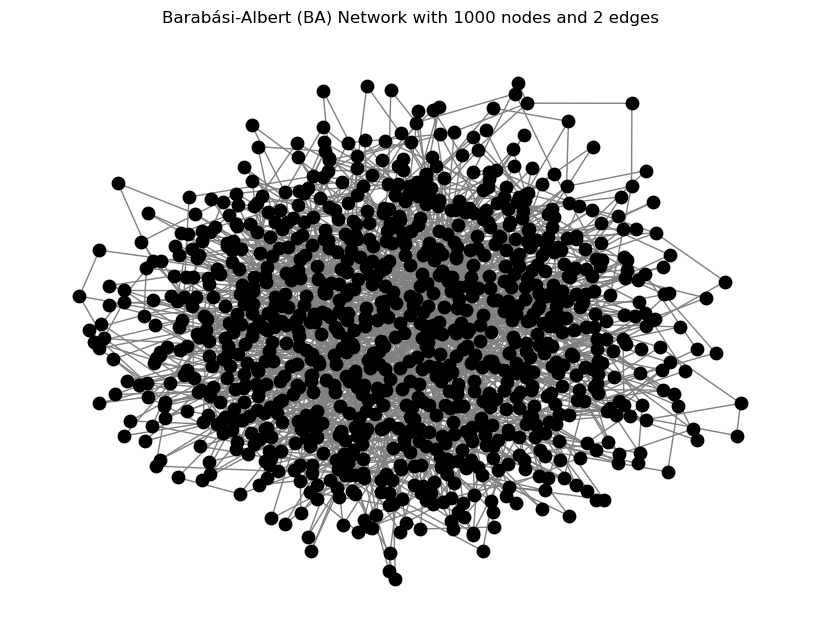


The friendship paradox holds 867 out of 1000 times (86.70%).

Node and Neighbor Statistics:
Iter |   Node |  Node Degree |   Avg Neighbor Deg |  Paradox Holds
--------------------------------------------------------------------
   1 |    728 |            2 |              24.00 |            Yes
   2 |    881 |            2 |               5.50 |            Yes
   3 |     64 |            8 |               6.62 |             No
   4 |    966 |            2 |               5.50 |            Yes
   5 |    563 |            4 |               7.50 |            Yes
   6 |    245 |            3 |              17.33 |            Yes
   7 |    813 |            2 |               6.50 |            Yes
   8 |    589 |            2 |              10.50 |            Yes
   9 |    707 |            3 |               3.00 |             No
  10 |    790 |            3 |              15.67 |            Yes


In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# set up the parameters for the ba model (how many nodes and edges per new node)
n = 1000  
m = 2   

# make a ba network using networkx
BA_network = nx.barabasi_albert_graph(n, m)

# this function checks if the friendship paradox holds for a random node
def check_friendship_paradox(G):
    # pick a random node from the network
    random_node = random.choice(list(G.nodes))  
    # get how many connections (degree) the random node has
    node_degree = G.degree(random_node)
    
    # find the neighbors (connections) of the random node
    neighbors = list(G.neighbors(random_node))
    if neighbors:
        # if the node has neighbors, calculate their average degree
        avg_neighbor_degree = sum(G.degree(neighbor) for neighbor in neighbors) / len(neighbors)
    else:
        # if the node has no neighbors, set the average degree to 0
        avg_neighbor_degree = 0  
    
    # return the node, its degree, its neighbors' average degree, and whether the paradox holds
    return random_node, node_degree, avg_neighbor_degree, avg_neighbor_degree > node_degree

# run the check for the friendship paradox 1000 times
paradox_count = 0
iterations = 1000
node_stats = []  # keep track of the stats for each iteration

for _ in range(iterations):
    # get stats for a random node
    node, node_degree, avg_neighbor_degree, paradox_holds = check_friendship_paradox(BA_network)
    
    # if the paradox holds, increment the count
    if paradox_holds:
        paradox_count += 1
    
    # save the stats from this iteration
    node_stats.append((node, node_degree, avg_neighbor_degree, paradox_holds))

# draw the network (this part is just for visualization)
plt.figure(figsize=(8, 6))
nx.draw(BA_network, with_labels=False, node_color='black', node_size=80, edge_color='gray')
plt.title(f"Barabási-Albert (BA) Network with {n} nodes and {m} edges")
plt.show()

# print how many times the paradox was true out of 1000
print(f"\nThe friendship paradox holds {paradox_count} out of {iterations} times ({paradox_count / iterations:.2%}).")

# show the stats for the first 10 iterations in a compact table format
print("\nNode and Neighbor Statistics:")
print(f"{'Iter':>4} | {'Node':>6} | {'Node Degree':>12} | {'Avg Neighbor Deg':>18} | {'Paradox Holds':>14}")
print("-" * 68)

# loop through the first 10 iterations and print out the node info
for i, (node, node_degree, avg_neighbor_degree, paradox_holds) in enumerate(node_stats[:10], 1):
    print(f"{i:>4} | {node:>6} | {node_degree:>12} | {avg_neighbor_degree:>18.2f} | {'Yes' if paradox_holds else 'No':>14}")


**1.2 THE FRIENDSHIP PARADOX MORE GENERALLY**


In this part, we will have the friendship paradox beyond BA model by applying the Erdős-Rényi(ER) Network. <br>
The **Erdős-Rényi Random Network** is a way to randomly connect points (or people) based on a set probability. It gives us a basic understanding of how connections might form in a network without any special rules or patterns.

Average degree of nodes: 4.80
Average degree of neighbors: 5.70


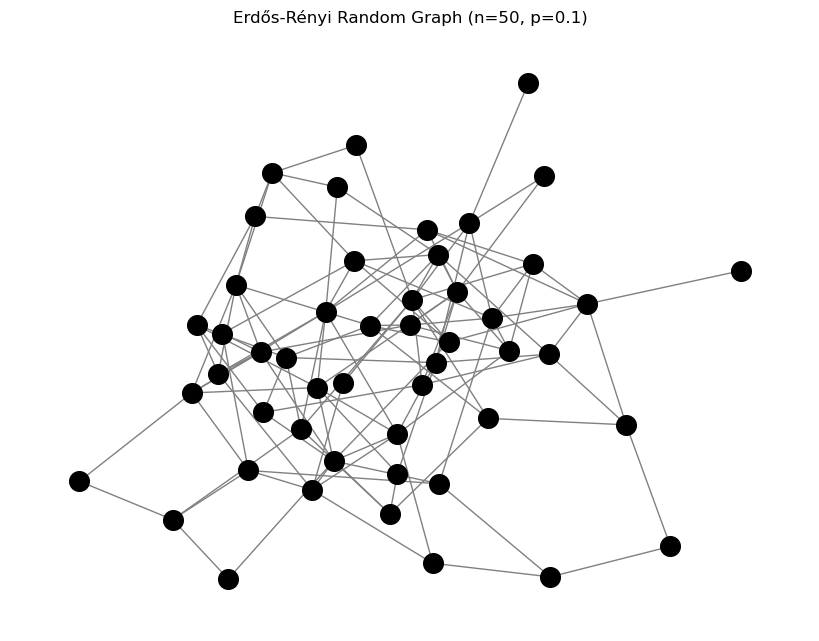

In [54]:
import numpy as np

#generate an Erdős-Rényi random graph
n = 50  # number of nodes
p = 0.1  # probability of edge creation

ER_network = nx.erdos_renyi_graph(n, p)

#Calculate the average degree of the network
average_degree = sum(dict(ER_network.degree()).values()) / n

#Calculate the average degree of neighbors for each node
neighbor_degrees = []
for node in ER_network.nodes:
    neighbors = list(ER_network.neighbors(node))
    if neighbors:  # Avoid division by zero
        avg_neighbor_degree = sum(ER_network.degree(neighbor) for neighbor in neighbors) / len(neighbors)
        neighbor_degrees.append(avg_neighbor_degree)

#average degree of neighbors
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

#compare the two averages
print(f"Average degree of nodes: {average_degree:.2f}")
print(f"Average degree of neighbors: {average_neighbor_degree:.2f}")

#visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(ER_network, with_labels=False, node_color='black', node_size=200, edge_color='gray')
plt.title(f"Erdős-Rényi Random Graph (n={n}, p={p})")
plt.show()


**1.3 THE FRIENDSHIP PARADOX AND THE CONFIGURATION MODEL**

The configuration model helps to build a network with a pre-defined degree sequence. 
In the network generated by the model each node has a pre-defined degree ki, but otherwise, the network is wired randomly. In this **Configuration Model** we are generating one network with a pre-defined sequence set by us. 

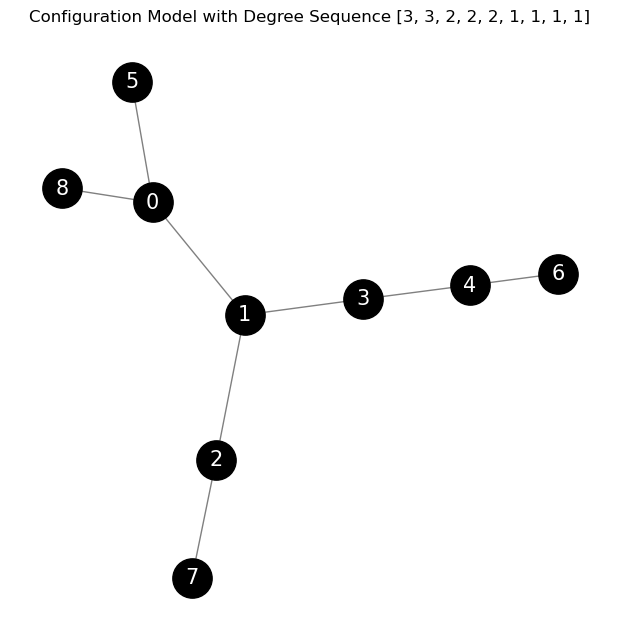

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

#defined degree sequence
degree_sequence = [3, 3, 2, 2, 2, 1, 1, 1, 1]

#keep generating the configuration model until it's connected
connected = False

while not connected:
    #step 1: Create a configuration model based on the degree sequence
    config_model = nx.configuration_model(degree_sequence)
    
    #step 2: Convert the MultiGraph to a simple Graph (remove parallel edges and self-loops)
    config_model = nx.Graph(config_model)
    
    #step 3: Check if the generated graph is connected
    if nx.is_connected(config_model):
        connected = True

#step 4: Visualize the network once its connected
plt.figure(figsize=(6, 6))

#using spring layout for better visualization
pos = nx.spring_layout(config_model, seed=42)

#draw the graph
nx.draw(config_model, pos, with_labels=True, node_color='black', 
        node_size=800, font_size=15, font_color='white', edge_color='gray')

plt.title("Configuration Model with Degree Sequence [3, 3, 2, 2, 2, 1, 1, 1, 1]")
plt.show()


In [61]:
#compute and print the table

print(f"{'Node':>5} | {'Degree':>6} | {'Avg Neighbor Degree':>20}")
print("-" * 33)

for node in config_model.nodes:
    node_degree = config_model.degree[node]  # Degree of the current node
    neighbors = list(config_model.neighbors(node))  # Get the neighbors of the node
    if neighbors:  # Avoid division by zero if there are no neighbors
        avg_neighbor_degree = sum(config_model.degree[n] for n in neighbors) / len(neighbors)
    else:
        avg_neighbor_degree = 0
    
    print(f"{node:>5} | {node_degree:>6} | {avg_neighbor_degree:>20.2f}")


 Node | Degree |  Avg Neighbor Degree
---------------------------------
    0 |      3 |                 1.67
    1 |      3 |                 2.33
    2 |      2 |                 2.00
    3 |      2 |                 2.50
    4 |      2 |                 1.50
    5 |      1 |                 3.00
    6 |      1 |                 2.00
    7 |      1 |                 2.00
    8 |      1 |                 3.00


The friendship paradox is observed in many nodes within this network. 
Specifically, the paradox shows that, on average, most nodes have fewer connections (lower degree) 
than their neighbors (friends). 
For example, consider Node 5, which has a degree of 1 (only one connection), 
but its neighbor(s) have an average degree of 3.00. This indicates that Node 5's friends, on average, 
have more friends than Node 5. 
This is a common phenomenon in real-world social networks and highlights how well-connected individuals 
tend to dominate the average connection count, skewing the perception of network connectivity.
